<a href="https://colab.research.google.com/github/SUMANADITHYA/Zeotap_Assignment_Suman/blob/main/Suman_Adithya_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [6]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')


merged_data.to_csv('/content/merged_data.csv', index=False)

In [12]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [13]:
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean'
}).reset_index()


In [14]:
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity', 'Price_x']])

In [17]:
db_scores = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_index)

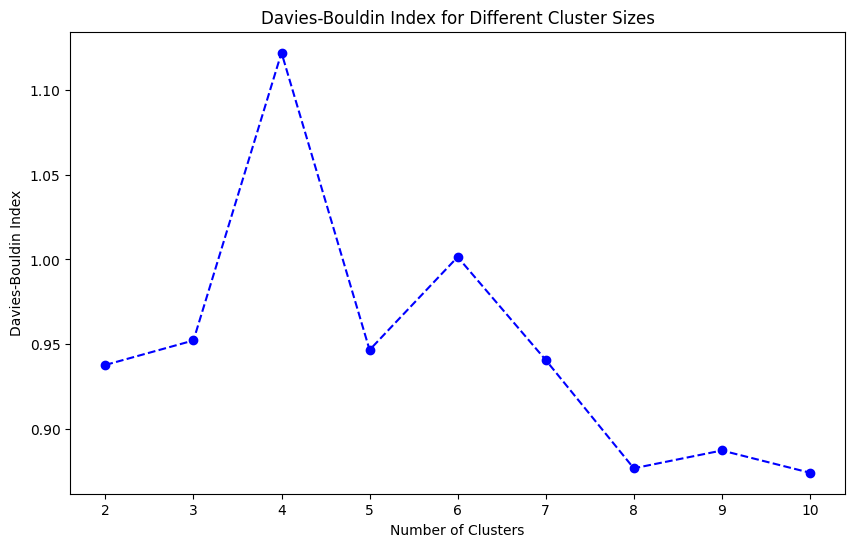

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, db_scores, marker='o', linestyle='--', color='b')
plt.title('Davies-Bouldin Index for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()


In [19]:
optimal_k = range_clusters[np.argmin(db_scores)]
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 10


In [20]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

In [21]:
merged_data = pd.merge(merged_data, customer_profiles[['CustomerID', 'Cluster']], on='CustomerID', how='left')

<ipython-input-25-a8f422c02c72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_profiles, x='Cluster', palette='viridis')


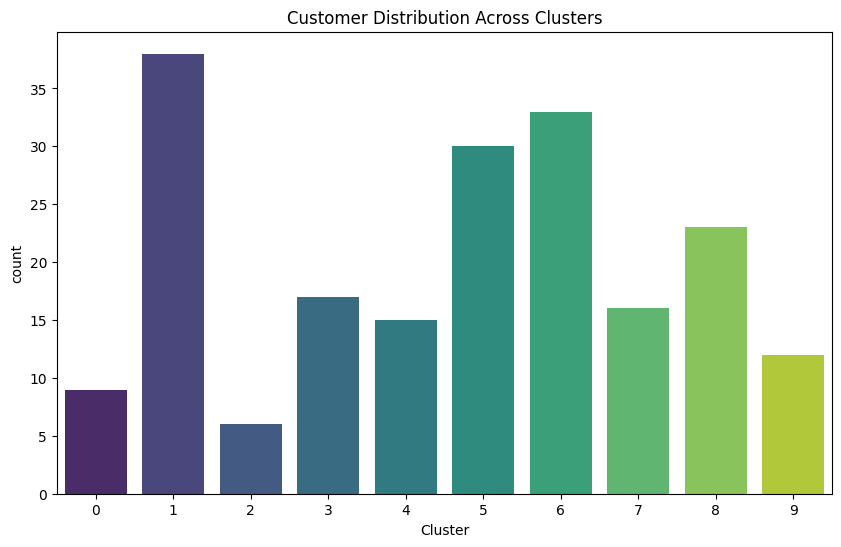

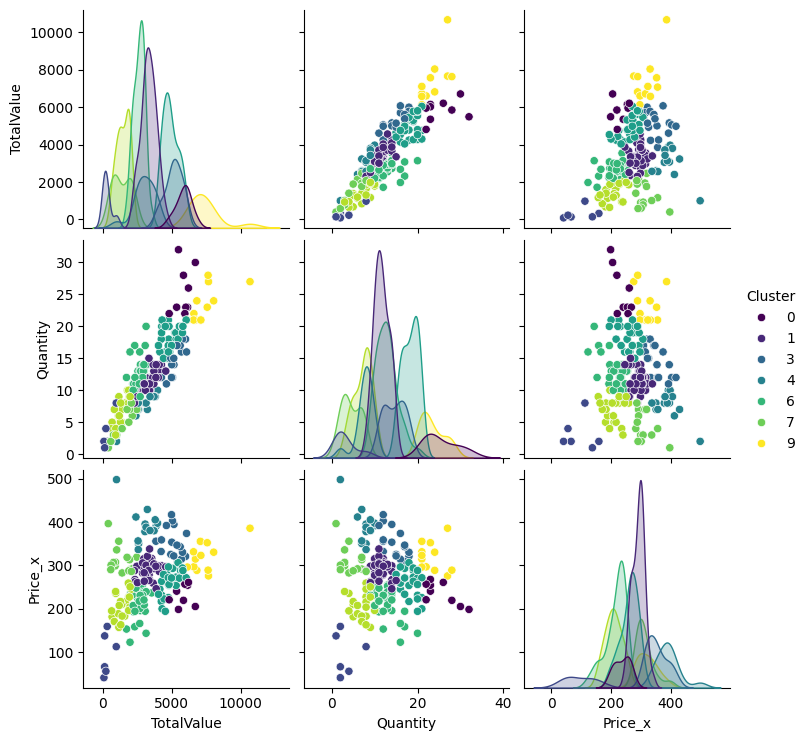

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_profiles, x='Cluster', palette='viridis')
plt.title('Customer Distribution Across Clusters')
plt.show()
sns.pairplot(customer_profiles, vars=['TotalValue', 'Quantity', 'Price_x'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

In [26]:
final_db_index = davies_bouldin_score(scaled_data, customer_profiles['Cluster'])
print(f'Final Davies-Bouldin Index: {final_db_index}')


Final Davies-Bouldin Index: 0.874354292939002


In [32]:
!pip install fpdf2


In [35]:
import pandas as pd
from fpdf import FPDF

def df_to_pdf(df, filename):

    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)


    for col in df.columns:
        pdf.cell(40, 10, col, 1)
    pdf.ln()

    for row in df.itertuples(index=False):
        for item in row:
            pdf.cell(40, 10, str(item), 1)
        pdf.ln()

    pdf.output(filename)

df_to_pdf(customer_profiles, '/content/Suman_Adithya_Clustering.pdf')

<ipython-input-35-d85e7f0d7363>:8: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
